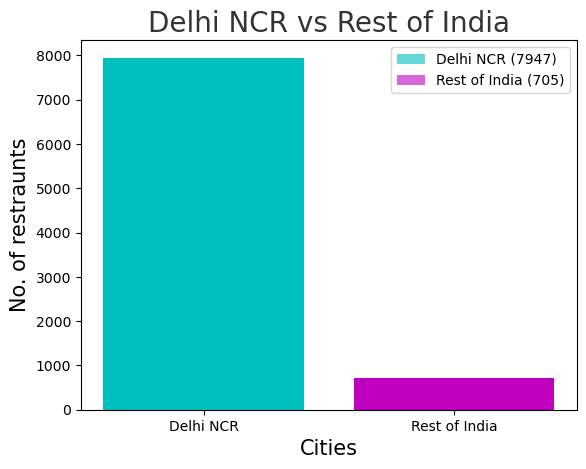

In [2]:
#number of restaurants present in Delhi NCR vs Rest of India.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df=df[df['Country Code']==1]
ndf=df[ (df['City']=='New Delhi') | (df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') |
         (df['City']=='Faridabad')]
ncr=ndf.count()
Total=df.count()
ROI=Total-ncr

x = ['Delhi NCR', 'Rest of India']
y = [ncr,ROI]
plt.bar(x[0],y[0],color='c',alpha=0.6)
plt.bar(x[1],y[1],color='m',alpha=0.6)
plt.ylabel("No. of restraunts",size=15)
plt.xlabel("Cities",size=15)
plt.title('Delhi NCR vs Rest of India',fontsize=20, color='black',alpha=0.8)
legend_labels = [f'{x[0]} ({y[0]["City"]})', f'{x[1]} ({y[1]["City"]})']
plt.legend(legend_labels)
plt.show()

In [3]:
df['City'].replace(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'],'Delhi NCR',inplace=True)
cuisines_NCR = df[df['City']=='Delhi NCR']['Cuisines'].str.split(', ')
cuisines_RI = df[df['City']!='Delhi NCR']['Cuisines'].str.split(', ')

In [4]:
#10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
NCR=[]
for i in cuisines_NCR:
    NCR.extend(i)

ND={}
for i in NCR:
    ND[i]=ND.get(i,0)+1
    
key1 = sorted(ND, key=ND.get, reverse=True)
print('***Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********')
ncr_count = []
ncr_cname = []
for i in key1[:10]:
    print(i, ND[i])
    ncr_count.append(ND[i])
    ncr_cname.append(i)

RI=[]
for i in cuisines_RI:
    RI.extend(i)

ID={}
for i in RI:
    ID[i]=ID.get(i,0)+1
    
key2 = sorted(ID, key=ID.get, reverse=True)
print()
print('***Top 10 cuisines served by maximum number of restaurants in Rest of INDIA**********')
roi_count = []
roi_cname = []
for i in key2[:10]:
    print(i, ID[i])
    roi_count.append(ID[i])
    roi_cname.append(i)

***Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535

***Top 10 cuisines served by maximum number of restaurants in Rest of INDIA**********
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


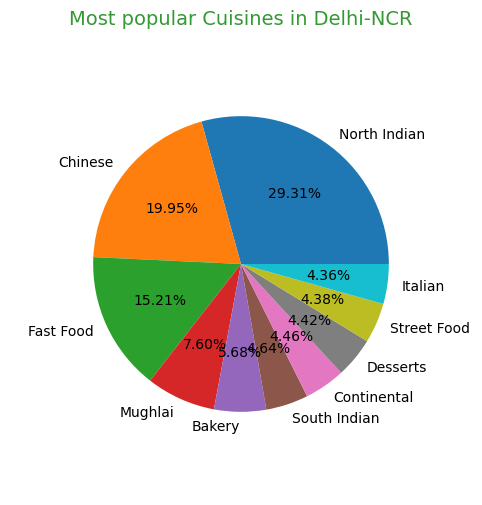

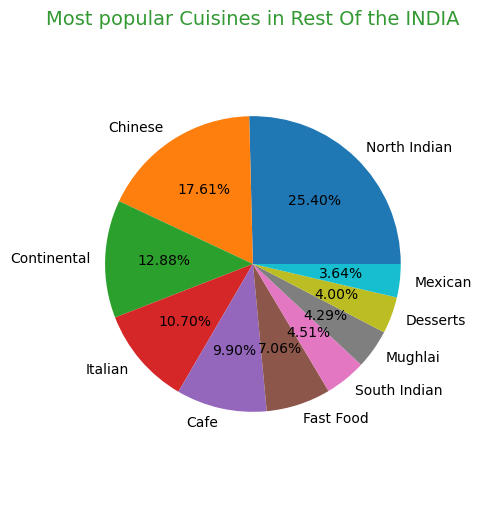

In [9]:
#cuisine served is different from Delhi NCR to Rest of India.
plt.figure(figsize=(12,6))
plt.pie(ncr_count,labels=ncr_cname,autopct='%0.2f%%',radius=0.8)
plt.title('Most popular Cuisines in Delhi-NCR',fontsize=14, color='green',alpha=0.8)
plt.show()

plt.figure(figsize=(12,6))
plt.pie(roi_count,labels=roi_cname,autopct='%0.2f%%',radius=0.8)
plt.title('Most popular Cuisines in Rest Of the INDIA',fontsize=14, color='green',alpha=0.8)
plt.show()

In [2]:
#Number of Votes given Restaurant
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes'],inplace=True)

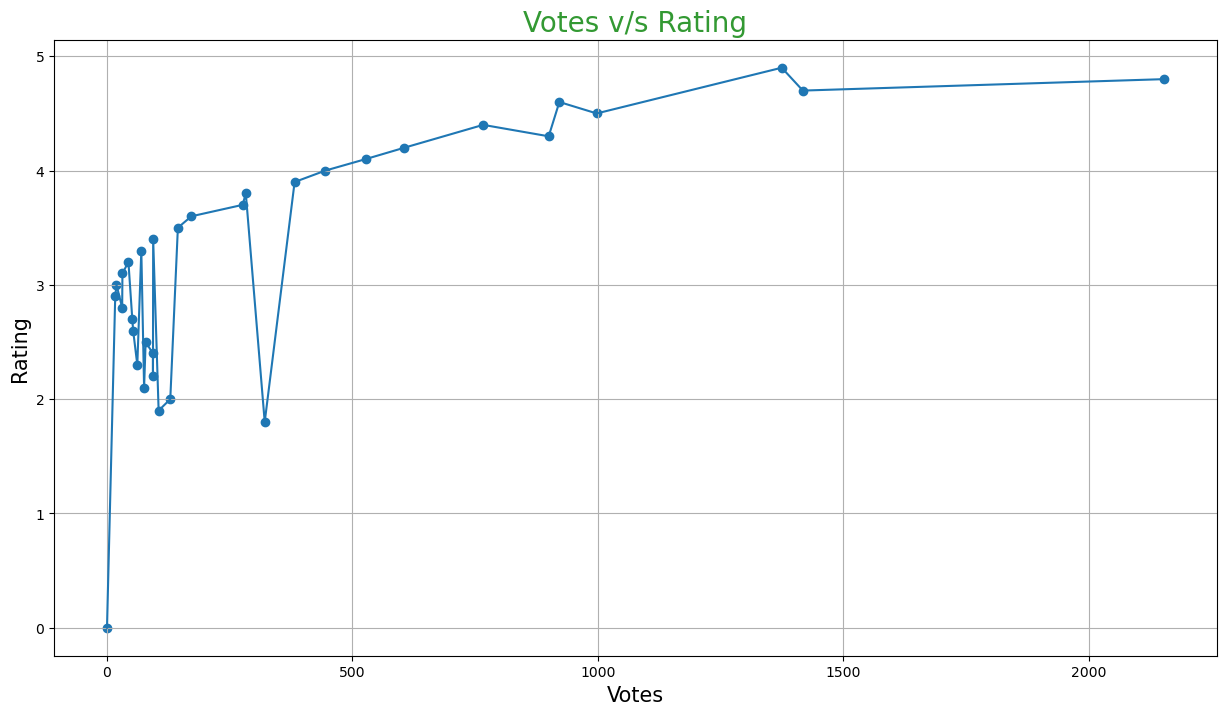

In [3]:
data = df["Votes"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
votes = c.values
plt.figure(figsize=(15,8))
plt.scatter(votes,rating)
plt.plot(votes,rating)
plt.title('Votes v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Votes',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

Inference :
The rating is between or below 3.5 and 4.5 if the votes are below or equal to 1000. We then see that as the rating increases , there is increase in number of votes. The highest rating is given by Votes that are 1400.

In [4]:
#Average Cost of Restaurant
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Average Cost for two'],inplace=True)
df = df[df['Average Cost for two']!=0]

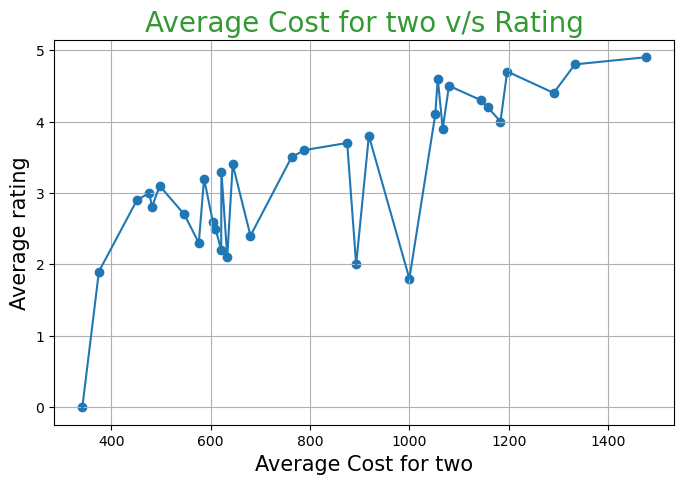

In [6]:
data = df["Average Cost for two"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
avg_cost = c.values

plt.figure(figsize=(8,5))
plt.scatter(avg_cost,rating)
plt.plot(avg_cost,rating)
plt.title('Average Cost for two v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.ylabel("Average rating",size=15)
plt.xlabel("Average Cost for two",size=15)
plt.grid()
plt.show()

Inference :
The rating is increasing drastically when cost increases from 0 to 1000. Then the rating increases gradually. This shows that there is an overall increase in the rating if the average cost increases.

In [13]:
#Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
#Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','Locality'],inplace=True)

*****Top 10 localities with top weighted restaurant rating**
Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


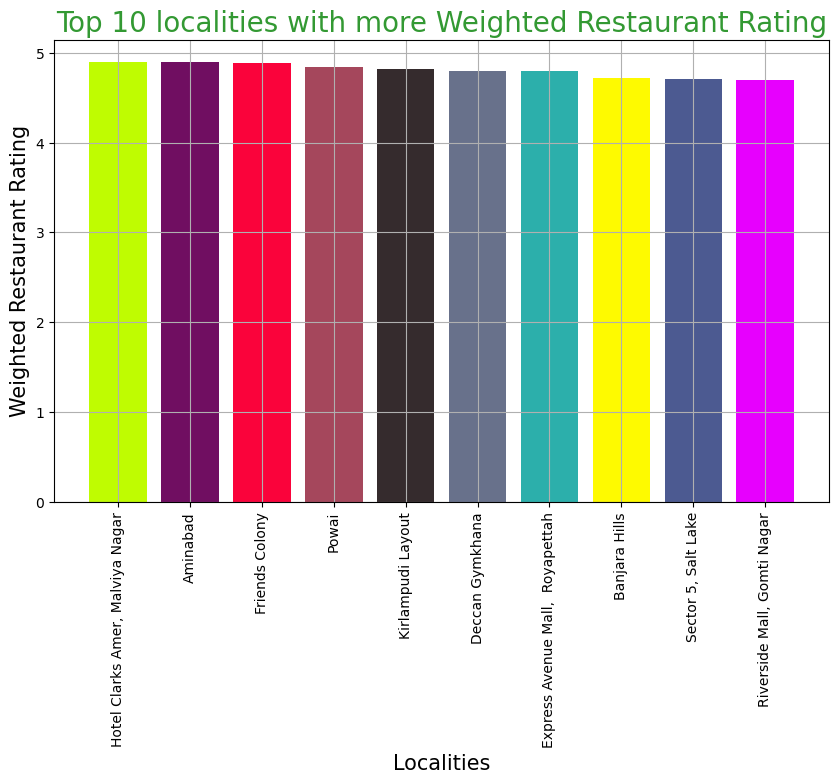

In [14]:
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))
weighted_rating = x/y
c=weighted_rating.sort_values(ascending=False)
locality = np.array(c.index[:10])
wt_rating = np.array(c.values[:10])
print('*****Top 10 localities with top weighted restaurant rating**')
for i in range(10):
    print(locality[i],round(wt_rating[i],2))
    
color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B','#2CAFAB','#FEFA00','#4C5A91','#E700FE']
plt.figure(figsize=(10,6))    
plt.bar(locality, wt_rating, color=color)
plt.ylabel('Weighted Restaurant Rating',size=15)
plt.xlabel('Localities',size=15)
plt.title('Top 10 localities with more Weighted Restaurant Rating',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Inference :
The weighted restaurant rating of top ten localities seems to be almost the same. The height of the bars are only gradually decreasing.

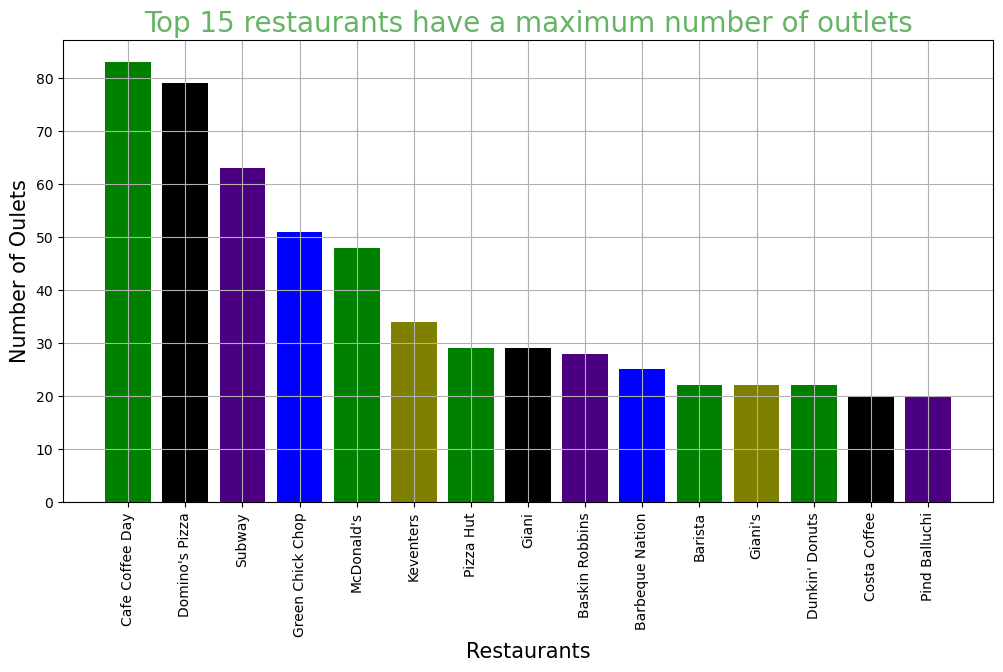

In [15]:
#Plot the bar graph top 15 restaurants have a maximum number of outlets.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
outlet = df['Restaurant Name'].value_counts().head(15)
outlet_name = list(outlet.index)
outlet_count = list(outlet.values)
color = ['green','black','indigo','blue','green','olive']
plt.figure(figsize=(12,6))
plt.bar(outlet_name,outlet_count,color=color)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Number of Oulets',size=15)
plt.xticks(rotation=90)
plt.title("Top 15 restaurants have a maximum number of outlets", fontsize=20, color='green',alpha=0.6)
plt.grid()
plt.show()

Inference :
From the graph we see that there is a gradual decrease in number of outlets. Cafe Coffee Day has the maximum number of outlets. Costa Coffee has the lowest number of outlets among the top 15 restaurants.

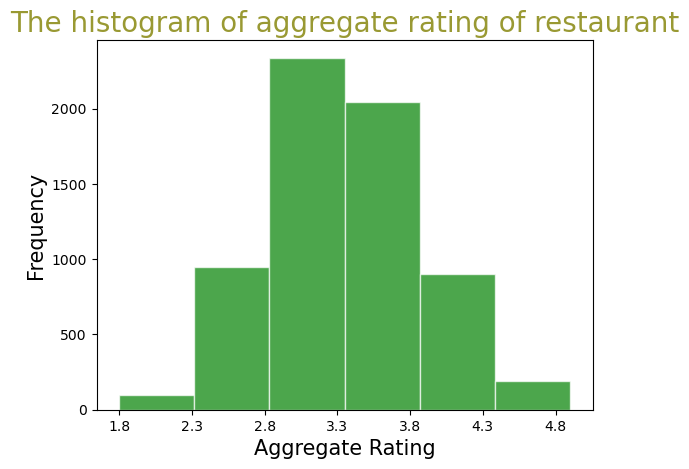

In [16]:
#Plot the histogram of aggregate rating of restaurant
df1 = df.copy()
df1.dropna(subset=['Aggregate rating'],inplace=True)
df1 = df1[df1['Aggregate rating']!=0]
rating = df1['Aggregate rating']
rating = list(rating)
xt = np.arange(1.8, 5, 0.5)
plt.hist(rating,bins=6,edgecolor='white',color='green',alpha=0.7)
plt.title('The histogram of aggregate rating of restaurant',fontsize=20, color='olive',alpha=0.8)
plt.ylabel('Frequency',size=15)
plt.xlabel('Aggregate Rating',size=15)
plt.xticks(xt)
plt.show()

Inference :
From the graph we infer that most of the restaurants are rated between 2.6 to 3.8 (approx). Maximum rating(5) has been given to less number of restaurants. There are less number of restaurants in the low rating range either.

Top 10 restaurants in the data with the highest number of votes
1 Toit 10934
2 Truffles 9667
3 Hauz Khas Social 7931
4 Peter Cat 7574
5 AB's - Absolute Barbecues 6907
6 Barbeque Nation 5966
7 Big Brewsky 5705
8 AB's - Absolute Barbecues 5434
9 The Black Pearl 5385
10 BarBQ 5288


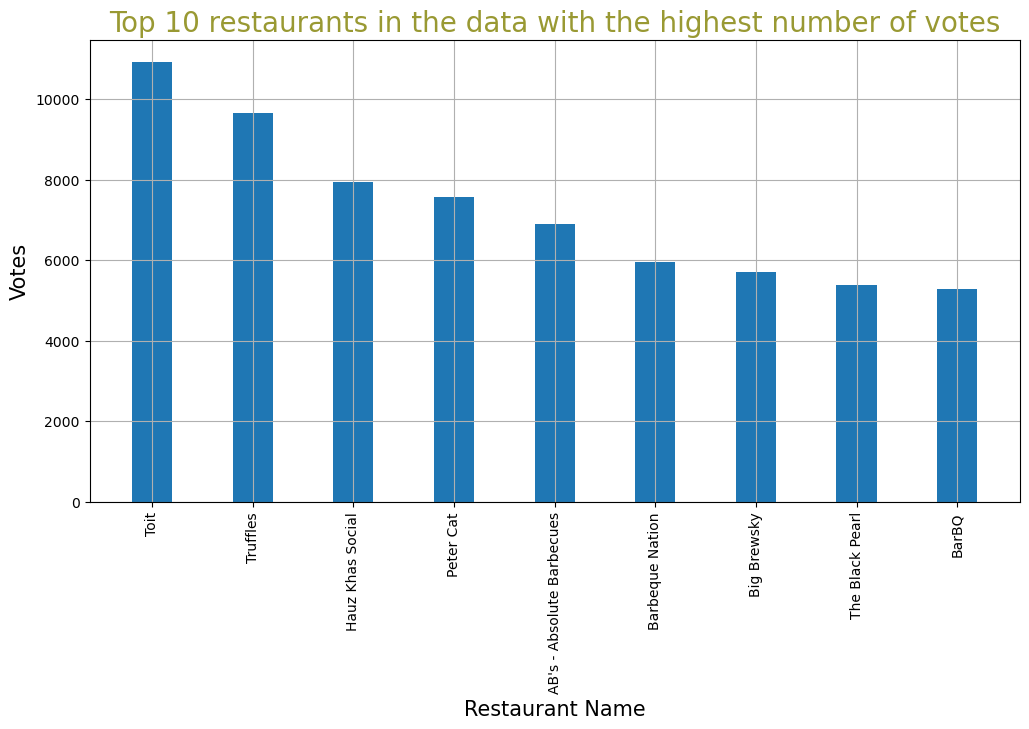

In [17]:
#Plot the bar graph top 10 restaurants in the data with the highest number of votes.
df2 = df.copy()
df2 = df2.sort_values(by ='Votes', ascending=False).head(10)
res_name = list(df2['Restaurant Name'])
votes = list(df2['Votes'])
print('Top 10 restaurants in the data with the highest number of votes')
for i in range(10):
    print(i+1,res_name[i],votes[i])

plt.figure(figsize=(12,6))
plt.bar(res_name,votes,width=0.4)
plt.ylabel("Votes",size=15)
plt.xlabel("Restaurant Name",size=15)
plt.title('Top 10 restaurants in the data with the highest number of votes',fontsize=20, color='olive',alpha=0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Inference :
From the graph we infer that Toit is the most voted restaurant in India with 10934 votes.

In [18]:
#Plot the pie graph of top 10 cuisines present in restaurants in the USA.
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==216]
df.dropna(subset=['Cuisines'],inplace=True)

***Top 10 cuisines present in restaurants in the USA**********
North Indian 3946
Chinese 2690
Fast Food 1963
Mughlai 992
Bakery 726
Continental 724
Italian 682
South Indian 631
Cafe 627
Desserts 597


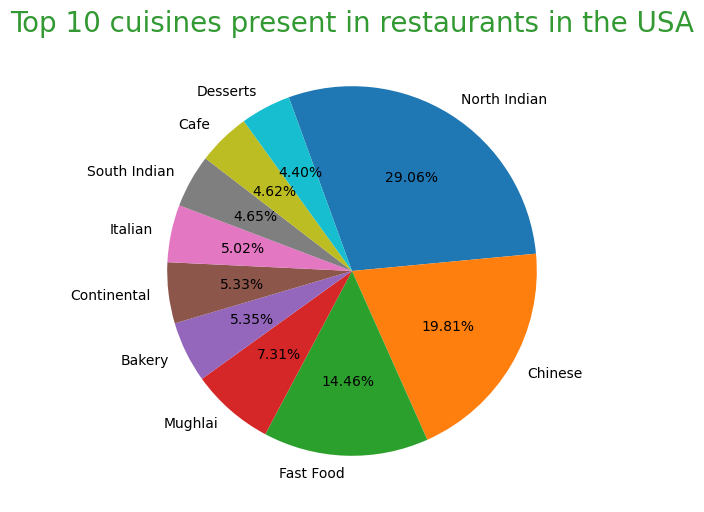

In [20]:
cuisines_usa = df['Cuisines'].str.split(', ')
cuisines = []
for i in cuisines_usa:
    cuisines.extend(i)
    
dct = {}
for i in cuisines:
    dct[i] = dct.get(i,0) + 1
    
key = sorted(dct, key=dct.get, reverse=True)
print('***Top 10 cuisines present in restaurants in the USA**********')
count = []
cuisines_name = []
for i in key[:10]:
    print(i, dct[i])
    count.append(dct[i])
    cuisines_name.append(i)
plt.figure(figsize=(12,6))
plt.pie(count,labels=cuisines_name,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 10 cuisines present in restaurants in the USA',fontsize=20, color='green',alpha=0.8)
plt.show()

From the graph we infer that American is the most popular cuisines in USA. Seafood, Burger,sandwich are also more popular cuisines in USA.